<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module5/M5_3/0_TSP_Pyomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRAVELING SALESMAN PROBLEM**

**OPIM 5641: Business Decision Modeling - University of Connecticut**

This section presents an example that shows how to solve the Traveling Salesman Problem (TSP) using Pyomo for given any 23 locations to keep it easy.


Resources:
* https://medium.com/analytics-vidhya/model-and-solution-of-the-traveling-salesman-problem-with-python-and-pyomo-db45f2631e8c
* https://stackoverflow.com/questions/54312316/pyomo-model-lp-file-with-variable-values


<image src='https://i.pinimg.com/originals/e5/07/d7/e507d704d4b6fdcb17116762fcd99acd.gif' height='250'>

In this notebook, you will learn how to:
1. Formulate the Traveling Salesman Problem(TSP) as a MIP model.
2. Use constraints to identify solutions of the TSP problem that are optimal using MTZ Formulation.


# Other Applications of Traveling Salesman problem

1. ***Genome Sequencing***

<image src='https://media3.giphy.com/media/3o7TKz2eMXx7dn95FS/giphy.gif' height='120'>

2. ***Drilling problems***

<image src='https://cdn.shopify.com/s/files/1/0257/0200/6832/files/01_1_large.gif?v=1569744446' height='180'>

3. ***Aiming telescopes and x-rays***

Hubble Space Telescope

<image src='https://64.media.tumblr.com/tumblr_memhckVI2T1rnq3cto1_500.gifv' height='150'>


4. ***Data Clustering***

<image src='https://miro.medium.com/max/796/1*Nx6IyGfRAV1ly6uDGnVCxQ.gif' height='150'>

5. ***Machine Scheduling***

Amazon warehouse robots

<image src='https://metro.co.uk/wp-content/uploads/2014/12/amazonrob0ts2.gif' height='150'>


5. ***Network Optimisation and Air traffic***

<image src='http://www.theprojectcounselgroup.com/wp-content/uploads/2020/08/05HnQSaCk8xF4mXRy.gif' height='200'> <image src='https://i.pinimg.com/originals/67/79/33/6779331fc92f4002f4011a560f16f611.gif' height='200'>







# Problem Statement

The TSP can be defined as follows: for a given list of cities and the distances between each pair of them, we want to find the shortest possible route that goes to each city once and returns to the origin city.

There is a class of Traveling Salesman Problems that assumes that the distance of going from city i
to city j is the same as going form city j to city i, this type of Traveling Salesman Problem is also known as the symmetric Traveling Salesman Problem. In this example, we use Manhattan distances, but the TSP model formulation is valid independent of the way in which the individual distances are determined.We can also use Euclidean distance for this type of problem.We used Manhattan distance to standardize the cost of travel in different solver by increassing distance between points and rounding them.

**Problem Scenario:**
A salesman was assigned an assignment to travel to 23 locations of Fairfield County in Connecticut in the state of Connecticut. He reached his manager due to budget cut.He had to finish the travel plan in less cost possible.His manager made this program to determine the optimal route to decrease travel cost and save money for the travel with the help of Connecticut Data.We assume the cost of travel is same as the distance covered by the Salesperson who travels at constant speed.

# Solver Time calculation

In [ ]:
# In this notebook, I will want to check the amount of time spent in the execution of each cell, so I need to install an additional package
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.64 s (started: 2021-03-19 14:52:06 +00:00)


In [ ]:
import time
start = time.time() #start time noted

time: 1.61 ms (started: 2021-03-19 14:52:09 +00:00)


## Data Preparation 

### Mount the Google Drive
Let's use GDOWN :)

In [ ]:
# from google.colab import drive, files 
# drive.mount('/content/drive/', force_remount=True)  #mounting drive

time: 694 µs (started: 2021-03-19 14:52:09 +00:00)


### Install "cbc" solver in pyomo and other packages





In [ ]:
import shutil
import sys
import os.path
import matplotlib.pyplot as plt


if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))
    
from pyomo.environ import *

time: 9.52 ms (started: 2021-03-19 14:52:09 +00:00)


In [ ]:
#import pandas and numpy for operations
import pandas as pd  #dataframes
import numpy as np #arrays 

time: 1.41 ms (started: 2021-03-19 14:52:09 +00:00)


In [ ]:
#import packages to calculate location distances 
from sklearn.metrics.pairwise import manhattan_distances #manhattan distances
from math import radians

time: 1.85 ms (started: 2021-03-19 14:52:09 +00:00)


In [ ]:
#import packages to plot maps and plots
import matplotlib.pyplot as plt
import seaborn as sns
#plotly packages
import plotly.express as px 
import plotly.graph_objects as go
import networkx as nx 
from pylab import * 

time: 4.98 ms (started: 2021-03-19 14:52:09 +00:00)


### Data wrangling

In [ ]:
#Reading data for Town Centroids
# https://drive.google.com/file/d/1PCuDeuLFA__tM3jfjTZZSy4G3FKpuRc6/view?usp=sharing
!gdown --id 1PCuDeuLFA__tM3jfjTZZSy4G3FKpuRc6
data = pd.read_csv('townCents.csv')

# X-longitude,Y-latitude 
geogTable = data[['X', 'Y']]

#check location data
data 

Downloading...
From: https://drive.google.com/uc?id=1PCuDeuLFA__tM3jfjTZZSy4G3FKpuRc6
To: /content/townCents.csv
100% 20.1k/20.1k [00:00<00:00, 17.5MB/s]


,X,Y,TOWN_NO,TOWN,TOTAL_SQMI,LAND_SQMI,WATER_SQMI,COUNTY,PLAN_ORG,DEP_DIST,COAST_AREA
0,-73.425651,41.986019,122,Salisbury,60.5,57.6,2.9,Litchfield,Northwestern Conn,DEP Western District,NaN
1,-73.293569,42.022264,100,North Canaan,19.6,19.6,0.0,Litchfield,Northwestern Conn,DEP Western District,NaN
2,-73.196224,41.980145,98,Norfolk,46.7,45.6,1.1,Litchfield,Litchfield Hills,DEP Western District,NaN
3,-73.080811,42.001546,29,Colebrook,33.0,32.8,0.2,Litchfield,Litchfield Hills,DEP Western District,NaN
4,-72.948897,42.004293,65,Hartland,34.5,33.0,1.5,Hartford,Litchfield Hills,DEP Western District,NaN
...,...,...,...,...,...,...,...,...,...,...,...
164,-73.346495,41.145319,158,Westport,22.4,19.9,2.5,Fairfield,Southwestern Conn,DEP Western District,OLISP Coastal Area
165,-73.559037,41.105028,135,Stamford,38.5,37.3,1.2,Fairfield,Southwestern Conn,DEP Western District,OLISP Coastal Area
166,-73.422614,41.118148,103,Norwalk,27.7,23.0,4.7,Fairfield,Southwestern Conn,DEP Western District,OLISP Coastal Area
167,-73.638467,41.069082,57,Greenwich,50.6,47.3,3.3,Fairfield,Southwestern Conn,DEP Western District,OLISP Coastal Area


time: 2.38 s (started: 2021-03-19 14:52:09 +00:00)


In [ ]:
data['COUNTY'].unique()

array(['Litchfield', 'Hartford', 'Tolland', 'Windham', 'New London',
       'Fairfield', 'Middlesex', 'New Haven'], dtype=object)

time: 5.76 ms (started: 2021-03-19 14:52:11 +00:00)


In [ ]:
#Simplify to only 23 towns...
df=data[data['COUNTY']=='Fairfield'] # get all the 23 towns in Fairfield County 
df.shape #check shape to verify df

(23, 11)

time: 6.6 ms (started: 2021-03-19 14:52:11 +00:00)


In [ ]:
df.reset_index(inplace=True) #reset index

time: 3.66 ms (started: 2021-03-19 14:52:11 +00:00)


In [ ]:
#plotting the towns on an interactive map
fig = px.scatter_mapbox(df, lat="Y", lon="X", color="TOWN",zoom=8.25) #easy format to draw maps on plotly
fig.update_layout(mapbox_style="carto-darkmatter",title="TOWN MAP")
config = dict({'scrollZoom': False}) #stopped zoom config for standard view capture
fig.show(config=config)

time: 687 ms (started: 2021-03-19 14:52:11 +00:00)


In [ ]:
# X-longitude,Y-latitude 
geogTable = df[['TOWN','X', 'Y']] 
geogTable #verify geogTable

,TOWN,X,Y
0,Sherman,-73.499182,41.580070
1,New Fairfield,-73.488281,41.487804
2,Brookfield,-73.392324,41.467530
3,Newtown,-73.292828,41.398823
4,Danbury,-73.470527,41.401364
5,Bethel,-73.392656,41.374802
6,Monroe,-73.224919,41.337934
7,Ridgefield,-73.501881,41.306154
8,Shelton,-73.138221,41.306098
9,Redding,-73.391392,41.305021


time: 24 ms (started: 2021-03-19 14:52:12 +00:00)


In [ ]:
#Make a back-up of the original XY data...
geogTable_orig = geogTable

time: 1.55 ms (started: 2021-03-19 14:52:12 +00:00)


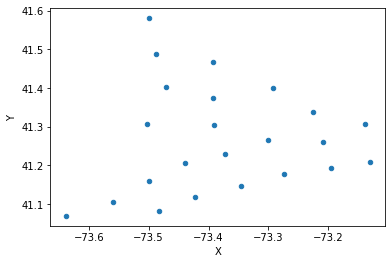

time: 166 ms (started: 2021-03-19 14:52:12 +00:00)


In [ ]:
#2D map of the cities...
geogTable.plot.scatter(x='X', y='Y') #x=long,Y=lat here
plt.show()

In [ ]:
# got the same result!
# you can just call this df and reference it below for data
geogDist=np.round(manhattan_distances(geogTable[['X', 'Y']])* 6371000/1000) # multiply by Earth radius to get kilometers of travel
#we rounded the value to compare the result with other solvers

time: 5.1 ms (started: 2021-03-19 14:52:12 +00:00)


In [ ]:
geogDist=pd.DataFrame(geogDist,index=df['TOWN'],columns=df['TOWN']) #distance matrix

time: 3.31 ms (started: 2021-03-19 14:52:12 +00:00)


Now that we have the cost matrix, we need to replace all values on the diagonal with a big number, like 99999. 

Source: https://stackoverflow.com/questions/24475094/set-values-on-the-diagonal-of-pandas-dataframe

In [ ]:
np.fill_diagonal(geogDist.values, 99999)

time: 1.57 ms (started: 2021-03-19 14:52:12 +00:00)


Check your work!

In [ ]:
geogDist #it worked 

TOWN,Sherman,New Fairfield,Brookfield,Newtown,Danbury,Bethel,Monroe,Ridgefield,Shelton,Redding,Easton,Trumbull,Weston,Stratford,Wilton,Fairfield,Bridgeport,New Canaan,Westport,Stamford,Norwalk,Greenwich,Darien
TOWN,,,,,,,,,,,,,,,,,,,,,,,
Sherman,99999.0,657.0,1398.0,2469.0,1321.0,1986.0,3290.0,1762.0,4045.0,2439.0,3276.0,3890.0,3047.0,4721.0,2755.0,4002.0,4400.0,2682.0,3743.0,3408.0,3431.0,4143.0,3286.0
New Fairfield,657.0,99999.0,741.0,1812.0,664.0,1329.0,2633.0,1244.0,3388.0,1782.0,2619.0,3233.0,2390.0,4064.0,2098.0,3345.0,3743.0,2164.0,3085.0,2889.0,2773.0,3625.0,2629.0
Brookfield,1398.0,741.0,99999.0,1072.0,920.0,593.0,1892.0,1726.0,2647.0,1041.0,1879.0,2493.0,1649.0,3323.0,1963.0,2605.0,3003.0,2646.0,2345.0,3372.0,2419.0,4107.0,3035.0
Newtown,2469.0,1812.0,1072.0,99999.0,1148.0,789.0,821.0,1922.0,1576.0,1226.0,900.0,1421.0,1594.0,2251.0,2159.0,1533.0,1931.0,2842.0,1957.0,3568.0,2615.0,4303.0,3231.0
Danbury,1321.0,664.0,920.0,1148.0,99999.0,665.0,1969.0,806.0,2724.0,1118.0,1955.0,2569.0,1726.0,3400.0,1434.0,2681.0,3079.0,1726.0,2421.0,2452.0,2110.0,3187.0,2115.0
Bethel,1986.0,1329.0,593.0,789.0,665.0,99999.0,1304.0,1133.0,2059.0,453.0,1290.0,1904.0,1061.0,2734.0,1370.0,2016.0,2414.0,2053.0,1756.0,2779.0,1826.0,3514.0,2442.0
Monroe,3290.0,2633.0,1892.0,821.0,1969.0,1304.0,99999.0,1967.0,755.0,1270.0,944.0,600.0,1638.0,1431.0,2204.0,1328.0,1110.0,2887.0,2002.0,3613.0,2660.0,4348.0,3276.0
Ridgefield,1762.0,1244.0,1726.0,1922.0,806.0,1133.0,1967.0,99999.0,2317.0,711.0,1549.0,2163.0,1319.0,2993.0,1027.0,2275.0,2673.0,954.0,2015.0,1646.0,1703.0,2381.0,1558.0
Shelton,4045.0,3388.0,2647.0,1576.0,2724.0,2059.0,755.0,2317.0,99999.0,1620.0,1294.0,740.0,1988.0,676.0,2554.0,1678.0,1091.0,3236.0,2351.0,3962.0,3009.0,4697.0,3626.0


time: 81.3 ms (started: 2021-03-19 14:52:12 +00:00)


In [ ]:
# now convert back to numpy array
geogDist = np.array(geogDist)
geogDist

array([[99999.,   657.,  1398.,  2469.,  1321.,  1986.,  3290.,  1762.,
         4045.,  2439.,  3276.,  3890.,  3047.,  4721.,  2755.,  4002.,
         4400.,  2682.,  3743.,  3408.,  3431.,  4143.,  3286.],
       [  657., 99999.,   741.,  1812.,   664.,  1329.,  2633.,  1244.,
         3388.,  1782.,  2619.,  3233.,  2390.,  4064.,  2098.,  3345.,
         3743.,  2164.,  3085.,  2889.,  2773.,  3625.,  2629.],
       [ 1398.,   741., 99999.,  1072.,   920.,   593.,  1892.,  1726.,
         2647.,  1041.,  1879.,  2493.,  1649.,  3323.,  1963.,  2605.,
         3003.,  2646.,  2345.,  3372.,  2419.,  4107.,  3035.],
       [ 2469.,  1812.,  1072., 99999.,  1148.,   789.,   821.,  1922.,
         1576.,  1226.,   900.,  1421.,  1594.,  2251.,  2159.,  1533.,
         1931.,  2842.,  1957.,  3568.,  2615.,  4303.,  3231.],
       [ 1321.,   664.,   920.,  1148., 99999.,   665.,  1969.,   806.,
         2724.,  1118.,  1955.,  2569.,  1726.,  3400.,  1434.,  2681.,
         3079.,  172

time: 16.5 ms (started: 2021-03-19 14:52:12 +00:00)


## **USING PYOMO:**

### Fit The Model
![formulation](https://wikimedia.org/api/rest_v1/media/math/render/svg/e34f8bf0f9cfd888592c2376150659eb2626d683)

The first set of equalities requires that each city is arrived at from exactly one other city, and the second set of equalities requires that from each city there is a departure to exactly one other city. The last constraints enforce that there is only a single tour covering all cities, and not two or more disjointed tours that only collectively cover all cities. 

In [ ]:
cost_matrix = geogDist
n = len(cost_matrix)

time: 1.81 ms (started: 2021-03-19 14:52:12 +00:00)


First we define an index of M and N locations.

In [ ]:
#Model
model = ConcreteModel() # Creates the model

#Indexes for the cities
model.M = RangeSet(n)                
model.N = RangeSet(n) # RangeSet(n)- Creates an index from 1 to n.

#Index for the dummy variable u
model.U = RangeSet(2,n) # Creates an index from 2 to n.

time: 4.01 ms (started: 2021-03-19 14:52:12 +00:00)


`Var(model.N,model.M, within=Binary)` Creates $N$ binary decision variables of size $M$.

`Var(model.N, within=NonNegativeIntegers,bounds=(0,n-1))` Creates $N$ Non negative integer decision variables that can only assume values between $0$ and $n-1$.

In [ ]:
#Decision variables xij
model.x=Var(model.N,model.M, within=Binary)

#Dummy variable ui
model.u=Var(model.N, within=NonNegativeIntegers,bounds=(0,n-1))

time: 4.89 ms (started: 2021-03-19 14:52:13 +00:00)


Now provide the cost matrix.

`Param(modelo.N, model.M,initialize=lambda model, i, j: cost_matrix[i-1][j-1])` Provides a NxM parameter to the model using a lambda function.

In [ ]:
#Cost Matrix cij
model.c = Param(model.N, model.M,initialize=lambda model, i, j: cost_matrix[i-1][j-1])

time: 6.16 ms (started: 2021-03-19 14:52:13 +00:00)


###Objective function

Define the objective function as the sum of route pairs.
```
99999.0*x[1,1] + 1072.0*x[1,2] + 1499.0*x[1,3] + 2296.0*x[1,4] +...
```



In [ ]:
def obj_func(model):
    return sum(model.x[i,j] * model.c[i,j] for i in model.N for j in model.M)

model.objective = Objective(rule=obj_func,sense=minimize)

time: 9.33 ms (started: 2021-03-19 14:52:13 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.



### Constraints

##### **Constraint #1**

<font color='red'> $\Sigma^{n}_{j=1,j \neq i}x_{ij}=1$ </font>

The first constraint which ensures that only 1 vehicle leaves each city can be formulated in the following way...

The output looks like this if there are only five cities that need to be viewed:

const1 : Size=5, Index=M, Active=True
        Key : Lower : Body                              : Upper : Active

          * 1 :   1.0 : x[2,1] + x[3,1] + x[4,1] + x[5,1] :   1.0 :   True
          * 2 :   1.0 : x[1,2] + x[3,2] + x[4,2] + x[5,2] :   1.0 :   True
          * 3 :   1.0 : x[1,3] + x[2,3] + x[4,3] + x[5,3] :   1.0 :   True
          * 4 :   1.0 : x[1,4] + x[2,4] + x[3,4] + x[5,4] :   1.0 :   True
          * 5 :   1.0 : x[1,5] + x[2,5] + x[3,5] + x[4,5] :   1.0 :   True

In [ ]:
def rule_const1(model,M):
    return sum(model.x[i,M] for i in model.N if i!=M ) == 1

model.const1 = Constraint(model.M,rule=rule_const1)

time: 10 ms (started: 2021-03-19 14:52:13 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.



`Constraint(model.M,rule=rule_const1)` Creates $M$ constraints defined by the `rule_const1`.

Remember, M is just an index of all locations (it's equal to n and includes every pair except (1,1) and (2,2) etc.) Hence, we have n-1 entries in each equation.

##### **Constraint #2**

<font color='red'> $ \sum_{i=1,i \neq j}^{n}x_{ij}=1 $ </font>

The second constraint which ensures that each city receives only 1 can be formulated by:

rest2 : Size=5, Index=N, Active=True
        Key : Lower : Body                              : Upper : Active

         * 1 :   1.0 : x[1,2] + x[1,3] + x[1,4] + x[1,5] :   1.0 :   True
         * 2 :   1.0 : x[2,1] + x[2,3] + x[2,4] + x[2,5] :   1.0 :   True
         * 3 :   1.0 : x[3,1] + x[3,2] + x[3,4] + x[3,5] :   1.0 :   True
         * 4 :   1.0 : x[4,1] + x[4,2] + x[4,3] + x[4,5] :   1.0 :   True
         * 5 :   1.0 : x[5,1] + x[5,2] + x[5,3] + x[5,4] :   1.0 :   True

In [ ]:
def rule_const2(model,N):
    return sum(model.x[N,j] for j in model.M if j!=N) == 1

model.rest2 = Constraint(model.N,rule=rule_const2)

time: 10.3 ms (started: 2021-03-19 14:52:13 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.



`Constraint(model.N,rule=rule_const2)` Creates $N$ constraints defined by the rule_const2.

##### **Constraint #3**
<font color='red'> $u_{i}+u_{j}+nx_{ij}\leq n-1\quad 2\leq i\neq j \leq n$  

$1\leq u_{i}\leq n-1  \quad 2\leq i \leq n$
</font>

Remember...
`model.U = RangeSet(2,n) # Creates an index from 2 to n.`

This gets rid of sub-tours.
https://how-to.aimms.com/Articles/332/332-Miller-Tucker-Zemlin-formulation.html

The third and last constraint it’s the one that enforce that there is only a single tour covering all cities, and not two or more disjointed tours that only collectively cover all cities.

This constraint is more involved.


const3 : Size=20, Index=const3_index, Active=True
        Key    : Lower : Body                   : Upper : Active

        (2, 1) :  -Inf : u[2] - u[1] + 5*x[2,1] :   4.0 :   True
        (2, 2) :   0.0 :            u[2] - u[2] :   0.0 :   True
        (2, 3) :  -Inf : u[2] - u[3] + 5*x[2,3] :   4.0 :   True
        (2, 4) :  -Inf : u[2] - u[4] + 5*x[2,4] :   4.0 :   True
        (2, 5) :  -Inf : u[2] - u[5] + 5*x[2,5] :   4.0 :   True
        (3, 1) :  -Inf : u[3] - u[1] + 5*x[3,1] :   4.0 :   True
        (3, 2) :  -Inf : u[3] - u[2] + 5*x[3,2] :   4.0 :   True
        (3, 3) :   0.0 :            u[3] - u[3] :   0.0 :   True
        (3, 4) :  -Inf : u[3] - u[4] + 5*x[3,4] :   4.0 :   True
        (3, 5) :  -Inf : u[3] - u[5] + 5*x[3,5] :   4.0 :   True
        (4, 1) :  -Inf : u[4] - u[1] + 5*x[4,1] :   4.0 :   True
        (4, 2) :  -Inf : u[4] - u[2] + 5*x[4,2] :   4.0 :   True
        (4, 3) :  -Inf : u[4] - u[3] + 5*x[4,3] :   4.0 :   True
        (4, 4) :   0.0 :            u[4] - u[4] :   0.0 :   True
        (4, 5) :  -Inf : u[4] - u[5] + 5*x[4,5] :   4.0 :   True
        (5, 1) :  -Inf : u[5] - u[1] + 5*x[5,1] :   4.0 :   True
        (5, 2) :  -Inf : u[5] - u[2] + 5*x[5,2] :   4.0 :   True
        (5, 3) :  -Inf : u[5] - u[3] + 5*x[5,3] :   4.0 :   True
        (5, 4) :  -Inf : u[5] - u[4] + 5*x[5,4] :   4.0 :   True
        (5, 5) :   0.0 :            u[5] - u[5] :   0.0 :   True

In [ ]:
print(model.u[2]()) # for example, this prints 3! does not include the base node

None
time: 1.75 ms (started: 2021-03-19 14:52:13 +00:00)


In [ ]:
def rule_const3(model,i,j):
    if i!=j: 
        return model.u[i] - model.u[j] + model.x[i,j] * n <= n-1
    else:
        #Skipped constraint
        return Constraint.Skip
    
model.const3 = Constraint(model.U,model.N,rule=rule_const3)

time: 32.7 ms (started: 2021-03-19 14:52:13 +00:00)


`Constraint(model.U,Model.N,rule=rule_const3)` Creates $UxN$ constraints defined by the `rule_const3`.

A *rule type* function must provide a Pyomo Object, so that’s why we had to write that weird else condition.

### Pretty print

In [ ]:
#Prints the entire model
model.pprint()

3 Set Declarations
    c_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    N*M :  529 : {(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7),

### Solve

In [ ]:
#Solves
solver = SolverFactory('cbc') #solver
result = solver.solve(model,tee = False) #solving for the optimal route 
#tee = false suppress all solver output to avoid Memory issues  
#Prints the results
print(result)


Problem: 
- Name: unknown
  Lower bound: 16571.0
  Upper bound: 16571.0
  Number of objectives: 1
  Number of constraints: 530
  Number of variables: 528
  Number of binary variables: 529
  Number of integer variables: 552
  Number of nonzeros: 506
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 24.93
  Wallclock time: 25.32
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 8083
      Number of created subproblems: 8083
    Black box: 
      Number of iterations: 271847
  Error rc: 0
  Time: 25.355280876159668
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

time: 25.4 s (started: 2021-03-19 14:52:13 +00:00)


In [ ]:
result.solver.termination_condition #check whether optimal or not

<TerminationCondition.optimal: 'optimal'>

time: 9.43 ms (started: 2021-03-19 14:52:39 +00:00)


### Solution

This shows the various routes that were selected.

In [ ]:
routes = []
List = list(model.x.keys())
for i in List:
    if model.x[i]() != 0:
        print(i,'--', model.x[i]())
        routes.append(i)

(1, 5) -- 1.0
(2, 1) -- 1.0
(3, 2) -- 1.0
(4, 6) -- 1.0
(5, 8) -- 1.0
(6, 3) -- 1.0
(7, 4) -- 1.0
(8, 10) -- 1.0
(9, 7) -- 1.0
(10, 13) -- 1.0
(11, 12) -- 1.0
(12, 17) -- 1.0
(13, 15) -- 1.0
(14, 9) -- 1.0
(15, 18) -- 1.0
(16, 11) -- 1.0
(17, 14) -- 1.0
(18, 20) -- 1.0
(19, 16) -- 1.0
(20, 22) -- 1.0
(21, 19) -- 1.0
(22, 23) -- 1.0
(23, 21) -- 1.0
time: 12.9 ms (started: 2021-03-19 14:52:39 +00:00)


Show this better...

In [ ]:
routes

[(1, 5),
 (2, 1),
 (3, 2),
 (4, 6),
 (5, 8),
 (6, 3),
 (7, 4),
 (8, 10),
 (9, 7),
 (10, 13),
 (11, 12),
 (12, 17),
 (13, 15),
 (14, 9),
 (15, 18),
 (16, 11),
 (17, 14),
 (18, 20),
 (19, 16),
 (20, 22),
 (21, 19),
 (22, 23),
 (23, 21)]

time: 4.92 ms (started: 2021-03-19 14:52:39 +00:00)


Sort using a for loop (not efficient)... could use dictionaries...

* https://stackoverflow.com/questions/41221428/sort-a-list-of-tuples-in-consecutive-order

In [ ]:
output=[]
given = routes
t = given[0][0]
for i in range(len(given)):
      # search tuples starting with element t
      output += [e for e in given if e[0] == t]
      t = output[-1][-1] # Get the next element to search

print(output)  

[(1, 5), (5, 8), (8, 10), (10, 13), (13, 15), (15, 18), (18, 20), (20, 22), (22, 23), (23, 21), (21, 19), (19, 16), (16, 11), (11, 12), (12, 17), (17, 14), (14, 9), (9, 7), (7, 4), (4, 6), (6, 3), (3, 2), (2, 1)]
time: 8.25 ms (started: 2021-03-19 14:52:39 +00:00)


Let's simplify even more...

* https://www.geeksforgeeks.org/python-convert-list-of-tuples-into-list/
* https://stackoverflow.com/questions/12897374/get-unique-values-from-a-list-in-python/37163210

In [ ]:
# convert tuple pairs to list
# using list comprehension 
output = [item for t in output for item in t] 
output

[1,
 5,
 5,
 8,
 8,
 10,
 10,
 13,
 13,
 15,
 15,
 18,
 18,
 20,
 20,
 22,
 22,
 23,
 23,
 21,
 21,
 19,
 19,
 16,
 16,
 11,
 11,
 12,
 12,
 17,
 17,
 14,
 14,
 9,
 9,
 7,
 7,
 4,
 4,
 6,
 6,
 3,
 3,
 2,
 2,
 1]

time: 6.3 ms (started: 2021-03-19 14:52:39 +00:00)


In [ ]:
# now return unique values
used = set()
mylist = output
unique = [x for x in mylist if x not in used and (used.add(x) or True)]
unique

[1,
 5,
 8,
 10,
 13,
 15,
 18,
 20,
 22,
 23,
 21,
 19,
 16,
 11,
 12,
 17,
 14,
 9,
 7,
 4,
 6,
 3,
 2]

time: 6.98 ms (started: 2021-03-19 14:52:39 +00:00)


Perfect! Now reshape the original data then plot.

In [ ]:
# first, subtract a 1 because it's python
unique = np.array(unique)
unique = unique-1
unique

array([ 0,  4,  7,  9, 12, 14, 17, 19, 21, 22, 20, 18, 15, 10, 11, 16, 13,
        8,  6,  3,  5,  2,  1])

time: 4.79 ms (started: 2021-03-19 14:52:39 +00:00)


In [ ]:
# now reindex the original data
geogTable_orig = geogTable_orig.reindex(unique)
geogTable_orig.loc[23,:]=geogTable_orig.iloc[0,:]
geogTable_orig

,TOWN,X,Y
0,Sherman,-73.499182,41.580070
4,Danbury,-73.470527,41.401364
7,Ridgefield,-73.501881,41.306154
9,Redding,-73.391392,41.305021
12,Weston,-73.372567,41.228433
14,Wilton,-73.439888,41.206932
17,New Canaan,-73.499224,41.159119
19,Stamford,-73.559037,41.105028
21,Greenwich,-73.638467,41.069082
22,Darien,-73.482355,41.081146


time: 32.7 ms (started: 2021-03-19 14:52:39 +00:00)


In [ ]:
geogTable_orig1=geogTable_orig[['X','Y']] #assign to new reindexed series and use it to plot the solution

time: 3.8 ms (started: 2021-03-19 14:52:39 +00:00)


#Results

### Visualize the solution

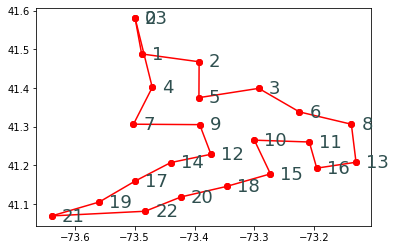

time: 287 ms (started: 2021-03-19 14:52:39 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = geogTable_orig1['X']
y = geogTable_orig1['Y']


for i in range(0, len(x), 1):
    plt.plot(x[i:i+2], y[i:i+2], 'ro-')

for k, v in geogTable_orig1.iterrows():
    plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='darkslategrey')

plt.show()

#### Detailed map of traveling sales man problem

Let's the graph more interactive and add colors

In [ ]:
mean(geogTable_orig['X'])  #for center of Map-mean longitude

-73.38167505884252

time: 6.27 ms (started: 2021-03-19 14:52:39 +00:00)


In [ ]:
mean(geogTable_orig['Y'])  #for center of Map-mean latitude

41.281754925157365

time: 3.85 ms (started: 2021-03-19 14:52:39 +00:00)


In [ ]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig['X'], #longitude
    lat = geogTable_orig['Y'], #latitude
    name="Main Route", 
    hovertext=geogTable_orig['TOWN'], #town name
    marker = {'size': 10}))

for i in range(len(geogTable_orig)):
  fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = [geogTable_orig.iloc[i,1],geogTable_orig.iloc[i-1,1]],
    lat = [geogTable_orig.iloc[i,2],geogTable_orig.iloc[i-1,2]],
    name="Route"+str(i),
    text=[geogTable_orig.iloc[i,0]+'-'+str(i),geogTable_orig.iloc[i-1,0]+'-'+str(i-1)], #name + station number
    textposition='top center',
    marker = {'size': 10}))
  
fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.25, mapbox_center_lat = 41.26878471063158,mapbox_center_lon = -73.37656607409332,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)


time: 272 ms (started: 2021-03-19 14:52:39 +00:00)


**We notice pyomo has generated an optimal solution which travels in anti-clockwise direction.**

#### Animated Visualisation

Let's add animations to plot


In [ ]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig['X'], #longitude
    lat = geogTable_orig['Y'], #latitude
    name="Traveling Salesman", 
    hovertext=geogTable_orig['TOWN'], #town name
    marker = {'size': 10}),
    layout=go.Layout(
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
        frames=[go.Frame(             #frames to show animation
        data=[go.Scattermapbox(
            lon=[geogTable_orig.iloc[k,1]],
            lat=[geogTable_orig.iloc[k,2]],
            mode="markers",
            marker=dict(color="red", size=10)
            )])

        for k in range(len(geogTable_orig))]
)
fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig['X'], #longitude
    lat = geogTable_orig['Y'], #latitude
    name="Main Route", 
    hovertext=geogTable_orig['TOWN'], #town name
    marker=dict(color="blue", size=5)))

#mean latitude and mean longitude are useful for setting the map here
fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.25, mapbox_center_lat = 41.26878471063158,mapbox_center_lon = -73.37656607409332,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE") #set the required zoom to look at output here 8.25
config = dict({'scrollZoom': False})
fig.show(config=config)

time: 1.78 s (started: 2021-03-19 14:52:40 +00:00)


In [ ]:
print("The minimum cost for travelling all the 23 places is ",model.objective(),"\n") #Minimum distance covered (or) Minimum Cost= 16571.0

The minimum cost for travelling all the 23 places is  16571.0 

time: 6.5 ms (started: 2021-03-19 14:52:41 +00:00)


### Print the file

In [ ]:
#filename = '/content/drive/MyDrive/BDM TA/Vehicle Routing Problem/TSP_pyomo.lp'
#model.write(filename, io_options={'symbolic_solver_labels': True})

time: 1.24 ms (started: 2021-03-19 14:52:41 +00:00)


# End time

In [ ]:
end = time.time() #End time noted
print(end - start," s")

32.41681146621704  s
time: 2.29 ms (started: 2021-03-19 14:52:41 +00:00)


#Conclusion

In this modeling example, we have shown how to formulate the symmetric Traveling Salesman Problem as a MIP problem. We also showed how to dynamically eliminate subtours by using Miller-Tucker-Zemlin Formulation.

#REFERENCES

https://en.wikipedia.org/wiki/Taxicab_geometry

https://en.wikipedia.org/wiki/Euclidean_distance

https://en.wikipedia.org/wiki/Travelling_salesman_problem

https://how-to.aimms.com/C_Developer/Sub_Mathematical_Modeling/index.html

https://how-to.aimms.com/Articles/332/332-Formulation-CVRP.html

https://how-to.aimms.com/Articles/332/332-Miller-Tucker-Zemlin-formulation.html

https://www.aimms.com/stories/

https://webinars.aimms.com/electricity-market-modeling-restore-aimms/?utm_source=website&utm_medium=stories-page

https://www.aimms.com/support/licensing/academic-license/

https://manual.aimms.com/_downloads/AIMMS_modeling.pdf

https://digitalcommons.georgiasouthern.edu/cgi/viewcontent.cgi?article=2913&context=etd

https://www.localsolver.com/docs/last/exampletour/vrp.html


https://plotly.com/python/lines-on-mapbox/

https://developers.google.com/optimization/examples

http://www.math.uwaterloo.ca/tsp/index.html

https://www.youtube.com/watch?v=q8nQTNvCrjE&t=35s

http://www.math.uwaterloo.ca/tsp/concorde.html

https://stackoverflow.com/questions/61793170/how-to-make-pyomo-silent-verbosity-0-when-solving-a-model


 D. L. Applegate, R. E. Bixby, V. Chvatal and W. J. Cook , The Traveling Salesman Problem: A Computational Study, Princeton University Press, Princeton, 2006.